---
title: PA 9.1
author: Sujanya Srinath
format:
    html:
        toc: true
        code-fold: true
theme: morph
embed-resources: true
---

## The Data

At this link, you will find a dataset containing information about heart disease patients: https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1

A description of the original dataset can be found here: https://archive.ics.uci.edu/dataset/45/heart+disease (However, this dataset has been cleaned and reduced, and the people have been given fictious names.)

## 1. Logistic Regression

Fit a Logistic Regression using only `age` and `chol` (cholesterol) as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

How high for the doctors to estimate a 90% chance that heart disease is present?


1587

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_selector
from plotnine import *

df = pd.read_csv('https://www.dropbox.com/scl/fi/0vrpdnq5asmeulc4gd50y/ha_1.csv?rlkey=ciisalceotl77ffqhqe3kujzv&dl=1')
df.head()

,Name,age,sex,cp,trtbps,chol,restecg,thalach,diagnosis
0,Magnolia Cassin,60,1,1,117,230,1,160,No Disease
1,Dr. Cathern Heathcote,60,0,3,102,318,1,160,Disease
2,Miles Wolf,62,0,3,130,263,1,97,No Disease
3,Mikaila Block,43,1,1,115,303,1,181,Disease
4,Mrs. Jacquline Marquardt,66,1,1,120,302,0,151,Disease


In [5]:
X=df[['age','chol']]
y=df['diagnosis']
age = 55

# log pipeline syntax asked chatgpt

log_pipeline = Pipeline([
    ("log", LogisticRegression())
])

#asked chatgpt syntax for getting coefficients of the intercept,age and chol
log_intercept = log_pipeline.fit(X, y).named_steps["log"].intercept_[0]
log_coef_age = log_pipeline.fit(X, y).named_steps["log"].coef_[0][0]
log_coef_chol = log_pipeline.fit(X, y).named_steps["log"].coef_[0][1]

def find_chol(age, probability, intercept, coef_age, coef_chol):
    """
    Calculates the cholesterol level required to achieve a specific probability
    of the heart disease, based on a logistic regression model.

    Parameters
    ----------
    age : float or int
        The age of the individual.

    probability : float
        The target probability of the heart disease.
        Must be in the range (0, 1).

    intercept : float
        The intercept (bias term) of the logistic regression model.

    coef_age : float
        The logistic regression coefficient associated with the 'age' feature.

    coef_chol : float
        The logistic regression coefficient associated with the 'cholesterol' feature.

    Returns
    -------
    float
        The cholesterol level required to get to the specified probability for the given age.

    Raises
    ------
    ValueError
        If the provided probability is not in the range (0, 1).
    """
    # asked chatgpt to help with calculating log odds
    if not (0 < probability < 1):
        raise ValueError("Probability must be between 0 and 1 (exclusive).")

    log_odds = np.log(probability / (1 - probability))
    chol = (log_odds - intercept - coef_age * age) / coef_chol
    return chol


# For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?
# using 0.5 because it is the standard for predictions and higher than 0.5 says heart disease is present
age = 55
chol_50 = find_chol(age, 0.5, log_intercept, log_coef_age, log_coef_chol)

print(f"For a 55-year-old:")
print(f"Cholesterol level for 90% probability of heart disease: {chol_50:.2f}")

# How high for the doctors to estimate a 90% chance that heart disease is present?
age = 55
chol_90 = find_chol(age, 0.9, log_intercept, log_coef_age, log_coef_chol)

print(f"For a 55-year-old:")
print(f"Cholesterol level for 90% probability of heart disease: {chol_90:.2f}")

For a 55-year-old:
Cholesterol level for 90% probability of heart disease: 367.87
For a 55-year-old:
Cholesterol level for 90% probability of heart disease: 1587.72


## 2. Linear Discriminant Analysis

Fit an LDA model using only `age` and `chol` (cholesterol)  as predictors.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [6]:
# asked chatgpt for syntax of lda_pipeline
lda_pipeline = Pipeline([
    ("lda", LinearDiscriminantAnalysis())
])

#similar syntax from before for lda

lda_pipeline.fit(X, y)
lda = lda_pipeline.named_steps["lda"]
lda_coef_age = lda.coef_[0][0]
lda_coef_chol = lda.coef_[0][1]
lda_intercept = lda.intercept_[0]

def find_chol_lda(age, probability, intercept, coef_age, coef_chol):
    log_odds = np.log(probability / (1 - probability))
    chol = (log_odds - intercept - coef_age * age) / coef_chol
    return chol

chol_50_lda = find_chol_lda(55, 0.5, lda_intercept, lda_coef_age, lda_coef_chol)

print(f"For a 55-year-old:")
print(f"Cholesterol level for 50% probability of heart disease: {chol_50_lda:.2f}")

For a 55-year-old:
Cholesterol level for 50% probability of heart disease: 368.24


## 3. Support Vector Classifier

Fit an SVC model using only `age` and `chol` as predictors.  Don't forget to tune the regularization parameter.

For a 55 year old, how high would their cholesterol need to be for the doctors to predict heart disease is present?

In [7]:
X = df[['age', 'chol']]
y = df['diagnosis']
# asked chatgpt for syntax

ct = ColumnTransformer(
    [
        ("dummify", OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop="first"), make_column_selector(dtype_include=object))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

svc_pipeline = Pipeline(
    [("preprocessing", ct),
     ("svc", SVC(kernel='linear', probability = True))]
).set_output(transform="pandas")

svc_pipeline.fit(X, y)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('dummify',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f7bed972cb0>)])),
                ('svc', SVC(kernel='linear', probability=True))])

In [8]:
# looked up grid search on google
param_grid = {'svc__C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(svc_pipeline, param_grid, cv=5)

grid_search.fit(X, y)

# Best model
best_svc = grid_search.best_estimator_.named_steps["svc"]
best_svc

SVC(C=0.1, kernel='linear', probability=True)

In [9]:
print("Shape of svc.coef_:", best_svc.coef_.shape)
print("Value of svc.coef_:", best_svc.coef_)
print("Value of svc.intercept_:", best_svc.intercept_)

# Extract coefficients and intercepts
svc_coef = best_svc.coef_[0]  # Get the coefficients array for the binary classifier
svc_intercept = best_svc.intercept_[0]  # Scalar intercept value

# Define the probability threshold (0.5)
probability = 0.5
log_odds = np.log(probability / (1 - probability))  # log-odds for P=0.5

# Solve for cholesterol level
age = 55
cholesterol_needed = (log_odds - svc_intercept - svc_coef[0] * age) / svc_coef[1]
print(f"Required cholesterol level for a 55-year-old: {cholesterol_needed}")


Shape of svc.coef_: (1, 2)
Value of svc.coef_: [[0.06439804 0.00366067]]
Value of svc.intercept_: [-4.68655043]
Required cholesterol level for a 55-year-old: 312.69049430633044


## 4. Comparing Decision Boundaries

Make a scatterplot of `age` and `chol`, coloring the points by their true disease outcome.  Add a line to the plot representing the **linear separator** (aka **decision boundary**) for each of the three models above.

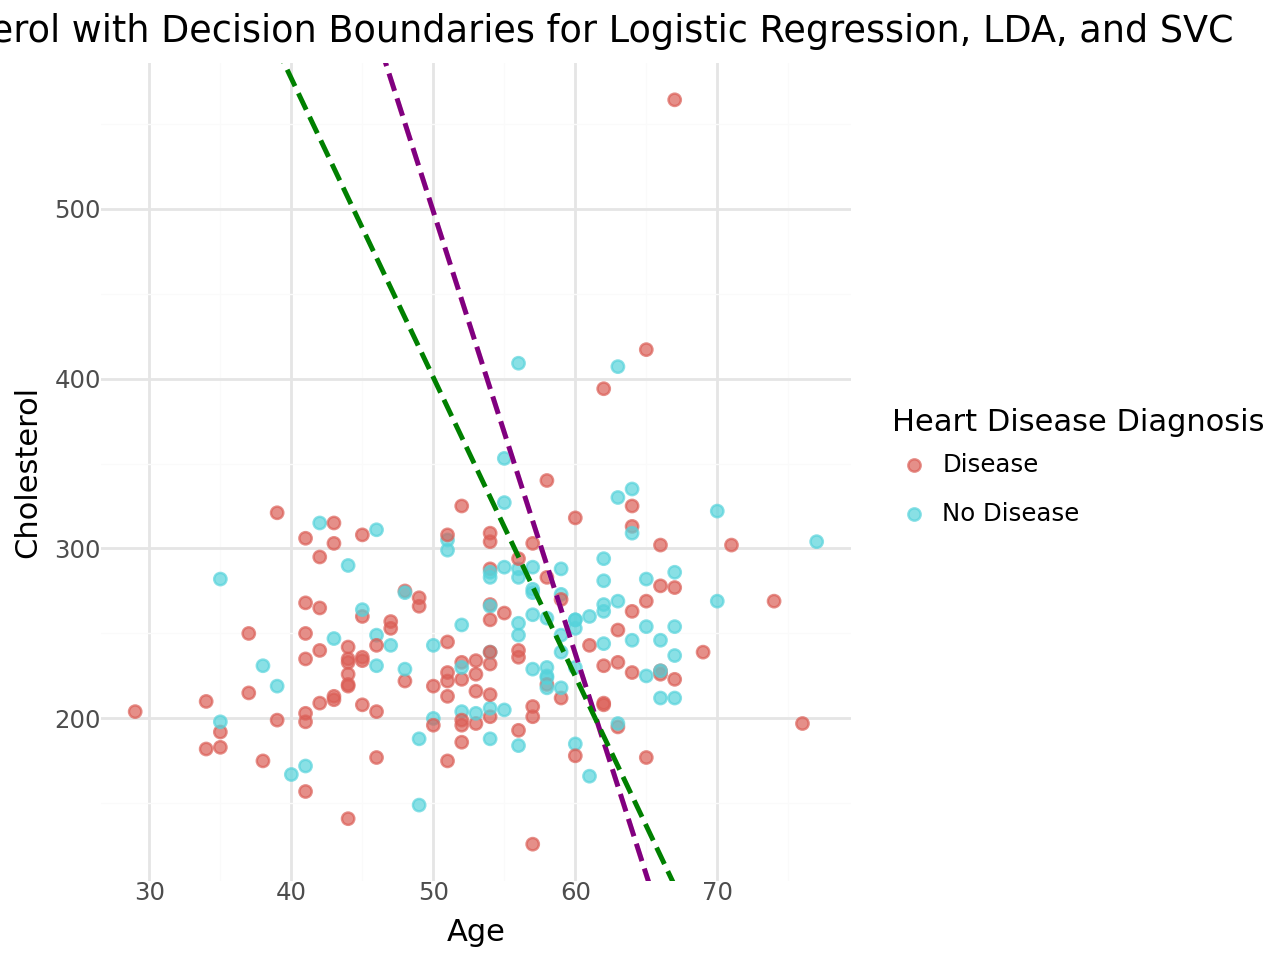

In [10]:
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_abline, labs, theme_minimal

# coefficients from the log model
log_intercept = log_pipeline.fit(X, y).named_steps["log"].intercept_[0]
log_coef_age = log_pipeline.fit(X, y).named_steps["log"].coef_[0][0]
log_coef_chol = log_pipeline.fit(X, y).named_steps["log"].coef_[0][1]

#coefficients from LDA
lda_coef_age = lda.coef_[0][0]
lda_coef_chol = lda.coef_[0][1]
lda_intercept = lda.intercept_[0]

# coefficients from SVC
svc_coef_age = best_svc.coef_[0][0]
svc_coef_chol = best_svc.coef_[0][1]
svc_intercept = best_svc.intercept_[0]
#chat helped
# Create a range of ages for plotting decision boundaries
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)

# Calculate the decision boundaries for each model
logreg_chol_boundary = -(log_intercept + log_coef_age * age_range) / log_coef_chol
lda_chol_boundary = -(lda_intercept + lda_coef_age * age_range) / lda_coef_chol
svc_chol_boundary = -(svc_intercept + svc_coef_age * age_range) / svc_coef_chol

#plot
(
    ggplot(df, aes(x='age', y='chol', color='factor(diagnosis)'))
    + geom_point(size=2, alpha=0.7)  # Scatterplot of age vs. cholesterol
    + geom_abline(slope=-log_coef_age/log_coef_chol, intercept=-log_intercept/log_coef_chol, linetype='dashed', color='pink', size=1)  # Logistic Regression boundary
    + geom_abline(slope=-lda_coef_age/lda_coef_chol, intercept=-lda_intercept/lda_coef_chol, linetype='dashed', color='purple', size=1)  # LDA boundary
    + geom_abline(slope=-svc_coef_age/svc_coef_chol, intercept=-svc_intercept/svc_coef_chol, linetype='dashed', color='green', size=1)  # SVC boundary
    + labs(title="Age vs Cholesterol with Decision Boundaries for Logistic Regression, LDA, and SVC",
           x="Age",
           y="Cholesterol",
           color="Heart Disease Diagnosis")
    + theme_minimal()
)
